# 2. Time Series Analysis 

### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np

### Importing our extracting data

In [2]:
df1= pd.read_csv('TSLA_old.csv') 
df2= pd.read_csv('FB_old.csv') 
df3= pd.read_csv('EA_old.csv') 
df4= pd.read_csv('NFLX_old.csv') 

In [3]:
df1.head()

,Unnamed: 0,Stock,Day,Month,Year,Open,High,Low,Close
0,0,NFLX,01,October,2019,267.350006,272.200012,264.029999,269.579987
1,1,NFLX,02,October,2019,263.609985,269.350006,262.190002,268.029999
2,2,NFLX,03,October,2019,267.779999,268.839996,257.010010,268.149994
3,3,NFLX,04,October,2019,268.200012,275.480011,266.470001,272.790009
4,4,NFLX,07,October,2019,271.989990,276.679993,271.279999,274.459991


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  519 non-null    int64 
 1   Stock       519 non-null    object
 2   Day         519 non-null    object
 3   Month       519 non-null    object
 4   Year        519 non-null    object
 5   Open        490 non-null    object
 6   High        490 non-null    object
 7   Low         490 non-null    object
 8   Close       490 non-null    object
dtypes: int64(1), object(8)
memory usage: 36.6+ KB


In [5]:
df1.describe()

,Unnamed: 0
count,519.000000
mean,259.000000
std,149.966663
min,0.000000
25%,129.500000
50%,259.000000
75%,388.500000
max,518.000000


In [6]:
df1.Day.describe()

count     519
unique     32
top        16
freq       18
Name: Day, dtype: object

### Setting the Desired Frequency

In [7]:
cols=["Day","Month","Year"]
df1['date'] = df1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df3['date'] = df3[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df4['date'] = df4[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [8]:
df1 = df1.drop(columns=["Day","Month","Year","Unnamed: 0"])
df1

,Stock,Open,High,Low,Close,date
0,NFLX,267.350006,272.200012,264.029999,269.579987,01-October-2019
1,NFLX,263.609985,269.350006,262.190002,268.029999,02-October-2019
2,NFLX,267.779999,268.839996,257.010010,268.149994,03-October-2019
3,NFLX,268.200012,275.480011,266.470001,272.790009,04-October-2019
4,NFLX,271.989990,276.679993,271.279999,274.459991,07-October-2019
...,...,...,...,...,...,...
514,NFLX,592.500000,592.979980,583.640015,592.390015,24-September-2021
515,NFLX,587.950012,593.580017,576.929993,592.640015,27-September-2021
516,NFLX,589.000000,599.539978,580.159973,583.849976,28-September-2021
517,NFLX,589.010010,609.880005,588.010010,599.059998,29-September-2021


In [9]:
df2 = df2.drop(columns=["Day","Month","Year","Unnamed: 0"])
df2

,Stock,Open,High,Low,Close,date
0,FB,179.149994,179.839996,174.880005,175.809998,1-10-2019
1,FB,174.839996,176.529999,173.089996,174.600006,2-10-2019
2,FB,175.570007,179.839996,173.630005,179.380005,3-10-2019
3,FB,NaN,NaN,NaN,NaN,4-10-2019
4,FB,180.000000,181.179993,178.089996,179.679993,7-10-2019
...,...,...,...,...,...,...
500,FB,NaN,NaN,NaN,NaN,24-9-2021
501,FB,349.809998,355.149994,347.079987,353.579987,27-9-2021
502,FB,347.970001,349.600006,338.920013,340.649994,28-9-2021
503,FB,343.149994,345.230011,338.880005,339.609985,29-9-2021


In [10]:
df3 = df3.drop(columns=["Day","Month","Year","Unnamed: 0"])
df3

,Stock,Open,High,Low,Close,date
0,EA,97.809998,98.000000,95.129997,96.750000,01-Oct-2019
1,EA,96.000000,96.000000,92.440002,94.250000,02-Oct-2019
2,EA,NaN,NaN,NaN,NaN,03-Oct-2019
3,EA,94.339996,95.769997,94.339996,95.610001,04-Oct-2019
4,EA,95.120003,95.820000,93.320000,93.570000,07-Oct-2019
...,...,...,...,...,...,...
514,EA,NaN,NaN,NaN,NaN,24-Sep-2021
515,EA,129.270004,132.559998,128.940002,131.979996,27-Sep-2021
516,EA,131.860001,135.000000,131.520004,133.770004,28-Sep-2021
517,EA,133.850006,139.589996,133.809998,137.940002,29-Sep-2021


In [11]:
df4 = df4.drop(columns=["Day","Month","Year","Unnamed: 0"])
df4

,Stock,Open,High,Low,Close,date
0,NFLX,267.350006,272.200012,264.029999,269.579987,01-October-2019
1,NFLX,263.609985,269.350006,262.190002,268.029999,02-October-2019
2,NFLX,267.779999,268.839996,257.010010,268.149994,03-October-2019
3,NFLX,268.200012,275.480011,266.470001,272.790009,04-October-2019
4,NFLX,271.989990,276.679993,271.279999,274.459991,07-October-2019
...,...,...,...,...,...,...
514,NFLX,592.500000,592.979980,583.640015,592.390015,24-September-2021
515,NFLX,587.950012,593.580017,576.929993,592.640015,27-September-2021
516,NFLX,589.000000,599.539978,580.159973,583.849976,28-September-2021
517,NFLX,589.010010,609.880005,588.010010,599.059998,29-September-2021


In [12]:
df1.set_index("date", inplace=True)
df2.set_index("date", inplace=True)
df3.set_index("date", inplace=True)
df4.set_index("date", inplace=True)

In [13]:
df2.head()

,Stock,Open,High,Low,Close
date,,,,,
1-10-2019,FB,179.149994,179.839996,174.880005,175.809998
2-10-2019,FB,174.839996,176.529999,173.089996,174.600006
3-10-2019,FB,175.570007,179.839996,173.630005,179.380005
4-10-2019,FB,NaN,NaN,NaN,NaN
7-10-2019,FB,180.000000,181.179993,178.089996,179.679993


###  Handling Missing Values

In [14]:
df1['Open']= pd.to_numeric(df1['Open'],errors = 'coerce')
df1['High']= pd.to_numeric(df1['High'],errors = 'coerce')
df1['Low']= pd.to_numeric(df1['Low'],errors = 'coerce')
df1['Close']= pd.to_numeric(df1['Close'],errors = 'coerce')

In [15]:
df2['Open']= pd.to_numeric(df2['Open'],errors = 'coerce')
df2['High']= pd.to_numeric(df2['High'],errors = 'coerce')
df2['Low']= pd.to_numeric(df2['Low'],errors = 'coerce')
df2['Close']= pd.to_numeric(df2['Close'],errors = 'coerce')

In [16]:
df3['Open']= pd.to_numeric(df3['Open'],errors = 'coerce')
df3['High']= pd.to_numeric(df3['High'],errors = 'coerce')
df3['Low']= pd.to_numeric(df3['Low'],errors = 'coerce')
df3['Close']= pd.to_numeric(df3['Close'],errors = 'coerce')

In [17]:
df4['Open']= pd.to_numeric(df4['Open'],errors = 'coerce')
df4['High']= pd.to_numeric(df4['High'],errors = 'coerce')
df4['Low']= pd.to_numeric(df4['Low'],errors = 'coerce')
df4['Close']= pd.to_numeric(df4['Close'],errors = 'coerce')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 01-October-2019 to 30-September-2021
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   519 non-null    object 
 1   Open    476 non-null    float64
 2   High    476 non-null    float64
 3   Low     476 non-null    float64
 4   Close   476 non-null    float64
dtypes: float64(4), object(1)
memory usage: 24.3+ KB


In [19]:
df1.isna()

,Stock,Open,High,Low,Close
date,,,,,
01-October-2019,False,False,False,False,False
02-October-2019,False,False,False,False,False
03-October-2019,False,False,False,False,False
04-October-2019,False,False,False,False,False
07-October-2019,False,False,False,False,False
...,...,...,...,...,...
24-September-2021,False,False,False,False,False
27-September-2021,False,False,False,False,False
28-September-2021,False,False,False,False,False


In [20]:
df1.isna().sum()

Stock     0
Open     43
High     43
Low      43
Close    43
dtype: int64

In [21]:
df1.Open =df1.Open .fillna(method='ffill')
df1.High =df1.High .fillna(method='ffill')
df1.Low =df1.Low .fillna(method='ffill')
df1.Close =df1.Close .fillna(method='ffill')

In [22]:
df2.Open =df2.Open .fillna(method='ffill')
df2.High =df2.High .fillna(method='ffill')
df2.Low =df2.Low .fillna(method='ffill')
df2.Close =df2.Close .fillna(method='ffill')

In [23]:
df3.Open =df3.Open .fillna(method='ffill')
df3.High =df3.High .fillna(method='ffill')
df3.Low =df3.Low .fillna(method='ffill')
df3.Close =df3.Close .fillna(method='ffill')

In [24]:
df4.Open =df4.Open .fillna(method='ffill')
df4.High =df4.High .fillna(method='ffill')
df4.Low =df4.Low .fillna(method='ffill')
df4.Close =df4.Close .fillna(method='ffill')

In [25]:
df1.isna().sum()

Stock    0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [26]:
df2.isna().sum()

Stock    0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [27]:
df3.isna().sum()

Stock    0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [28]:
df4.isna().sum()

Stock    0
Open     0
High     0
Low      0
Close    0
dtype: int64

# Visualiztion 

In [29]:
import matplotlib.pyplot as plt 

###  Historical Data — Tesla

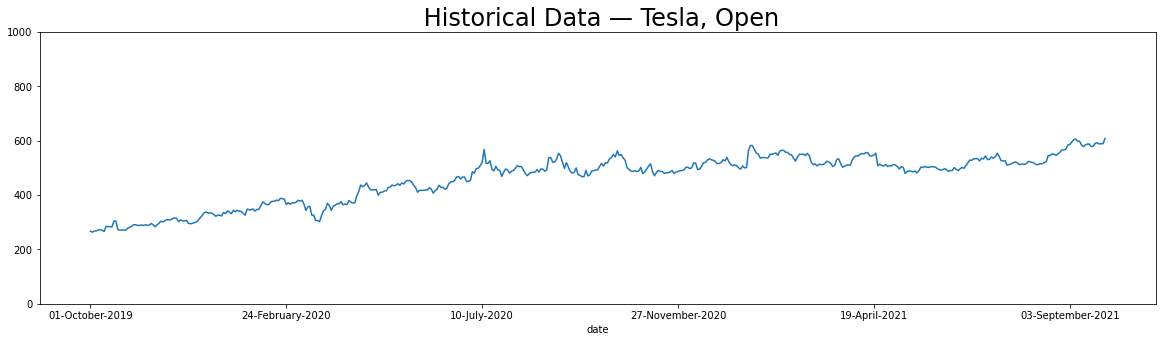

In [30]:
df1.Open.plot(figsize=(20,5))
plt.title(" Historical Data — Tesla, Open", size = 24)
plt.ylim(0,1000)
plt.show()

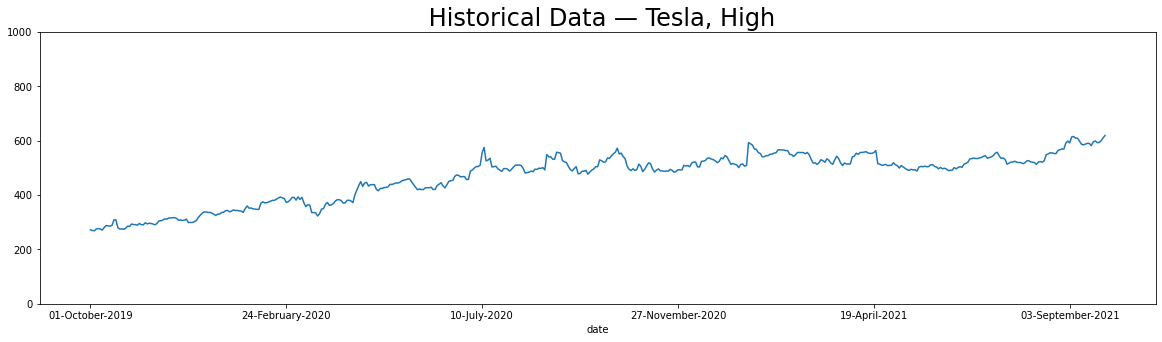

In [31]:
df1.High.plot(figsize=(20,5))
plt.title(" Historical Data — Tesla, High", size = 24)
plt.ylim(0,1000)
plt.show()

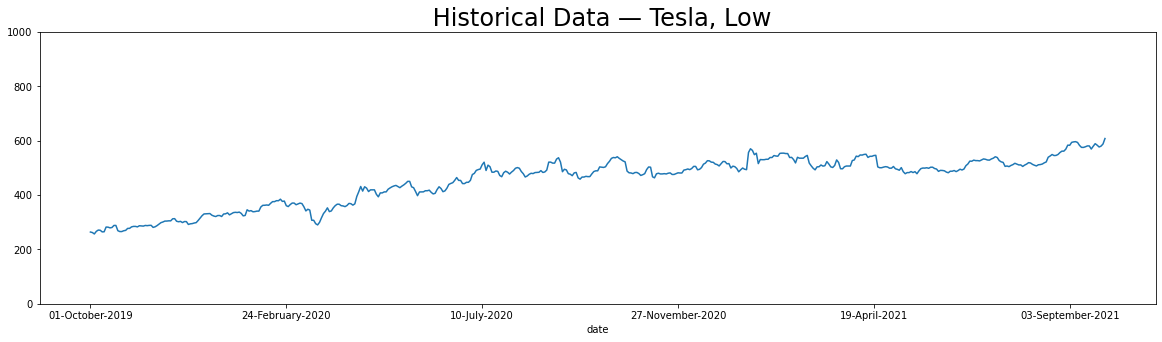

In [32]:
df1.Low.plot(figsize=(20,5))
plt.title(" Historical Data — Tesla, Low", size = 24)
plt.ylim(0,1000)
plt.show()

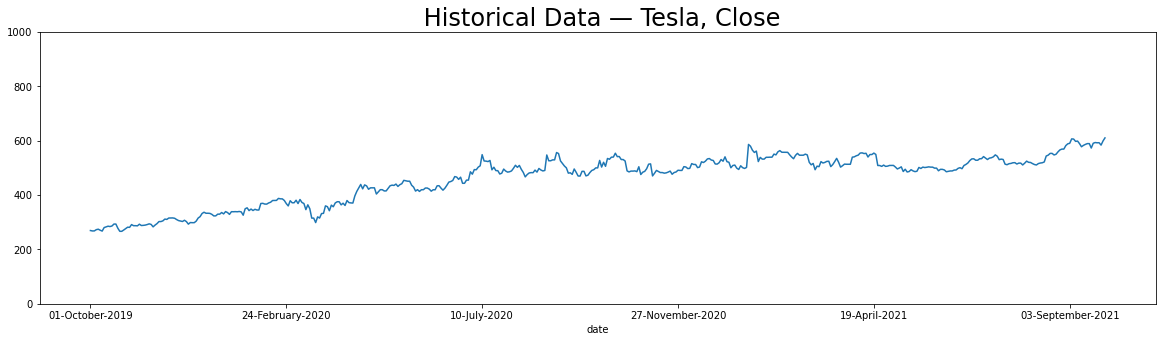

In [33]:
df1.Close.plot(figsize=(20,5))
plt.title(" Historical Data — Tesla, Close", size = 24)
plt.ylim(0,1000)
plt.show()

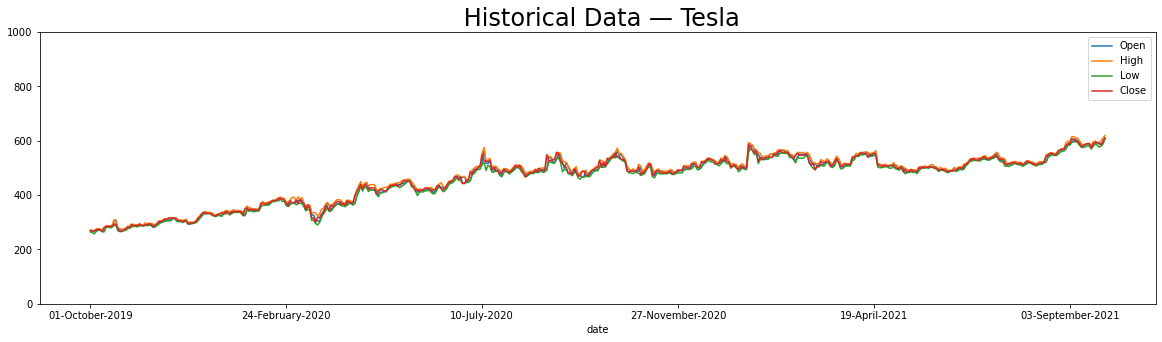

In [34]:
df1.plot(figsize=(20,5))
plt.title(" Historical Data — Tesla", size = 24)
plt.ylim(0,1000)
plt.show()

All columns have the same trend over time

### Historical Data — Facebook Inc. (FB)

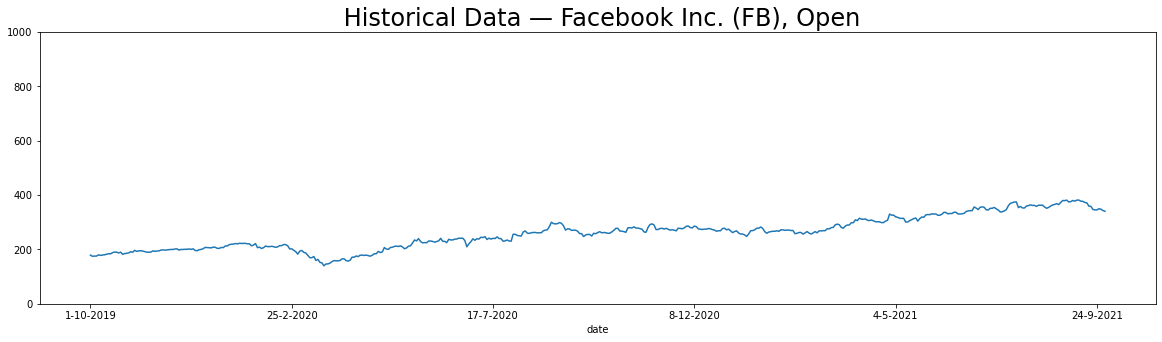

In [35]:
df2.Open.plot(figsize=(20,5))
plt.title(" Historical Data — Facebook Inc. (FB), Open", size = 24)
plt.ylim(0,1000)
plt.show()

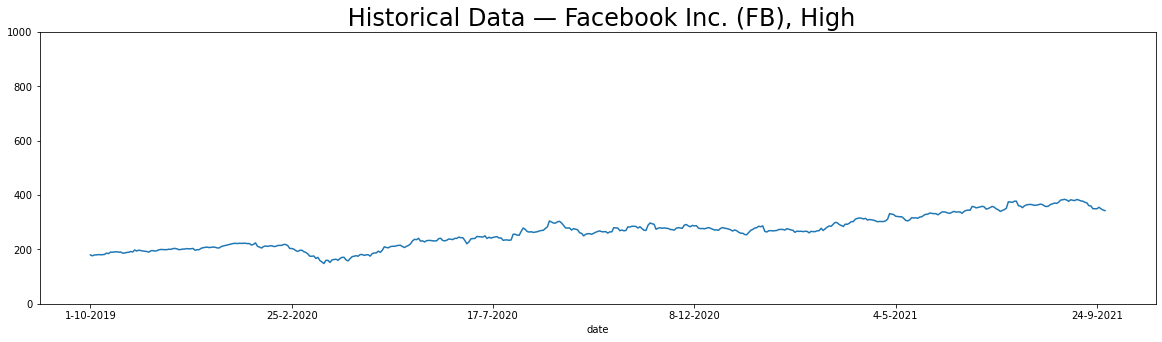

In [36]:
df2.High.plot(figsize=(20,5))
plt.title(" Historical Data — Facebook Inc. (FB), High", size = 24)
plt.ylim(0,1000)
plt.show()

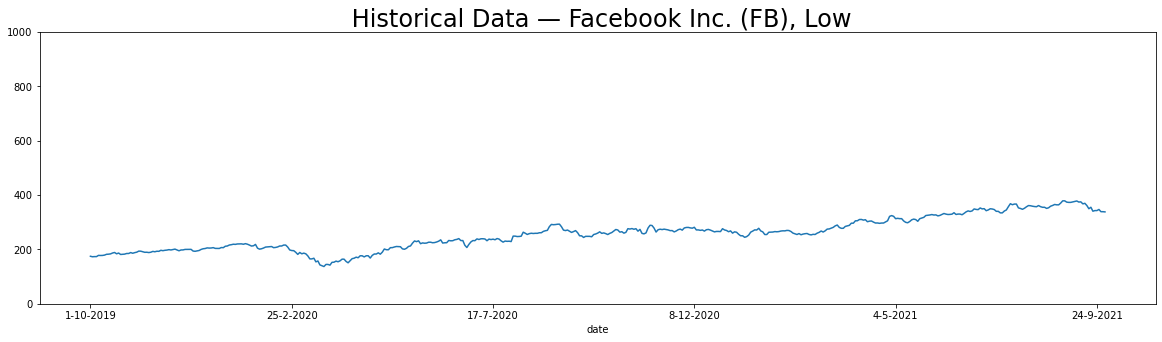

In [37]:
df2.Low.plot(figsize=(20,5))
plt.title(" Historical Data — Facebook Inc. (FB), Low", size = 24)
plt.ylim(0,1000)
plt.show()

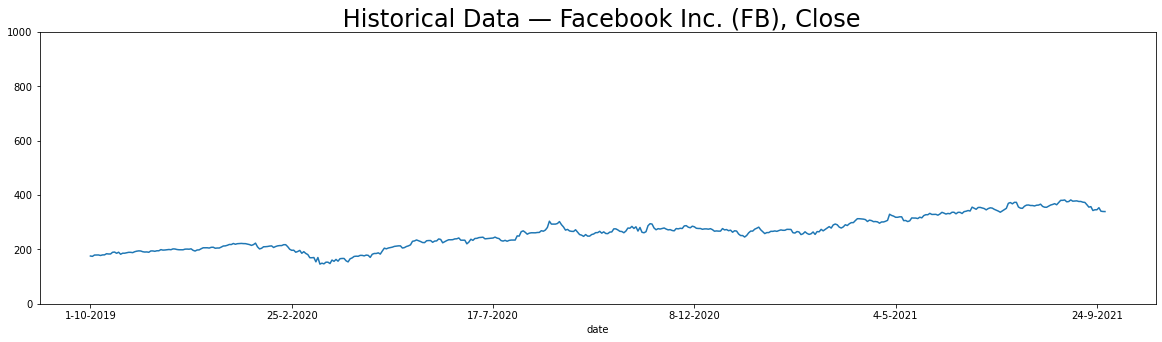

In [38]:
df2.Close.plot(figsize=(20,5))
plt.title(" Historical Data — Facebook Inc. (FB), Close", size = 24)
plt.ylim(0,1000)
plt.show()

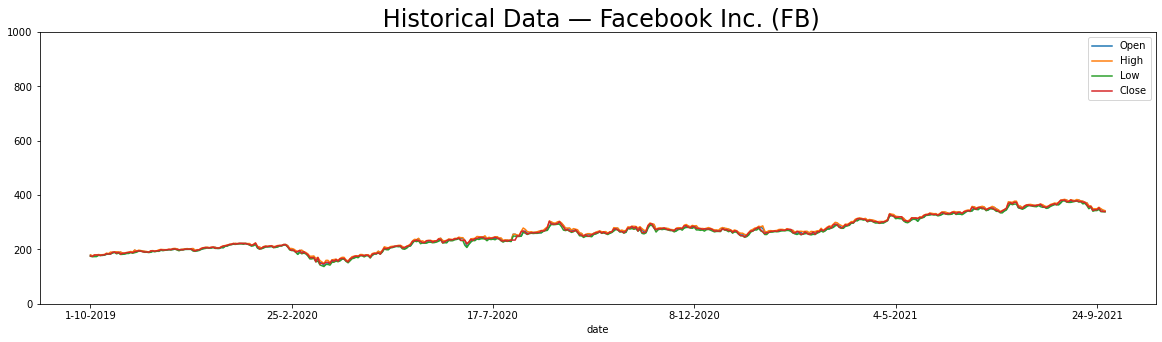

In [39]:
df2.plot(figsize=(20,5))
plt.title(" Historical Data — Facebook Inc. (FB)", size = 24)
plt.ylim(0,1000)
plt.show()

### Historical Data — Electronic Arts Inc. (EA)

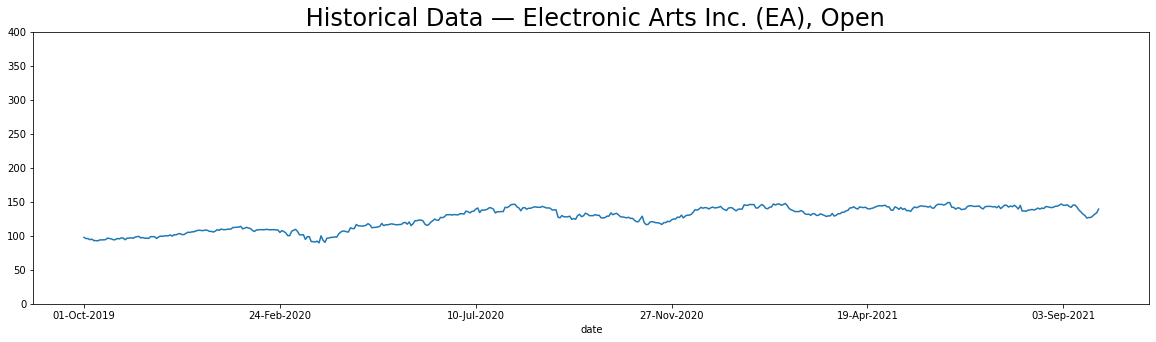

In [40]:
df3.Open.plot(figsize=(20,5))
plt.title(" Historical Data — Electronic Arts Inc. (EA), Open", size = 24)
plt.ylim(0,400)
plt.show()

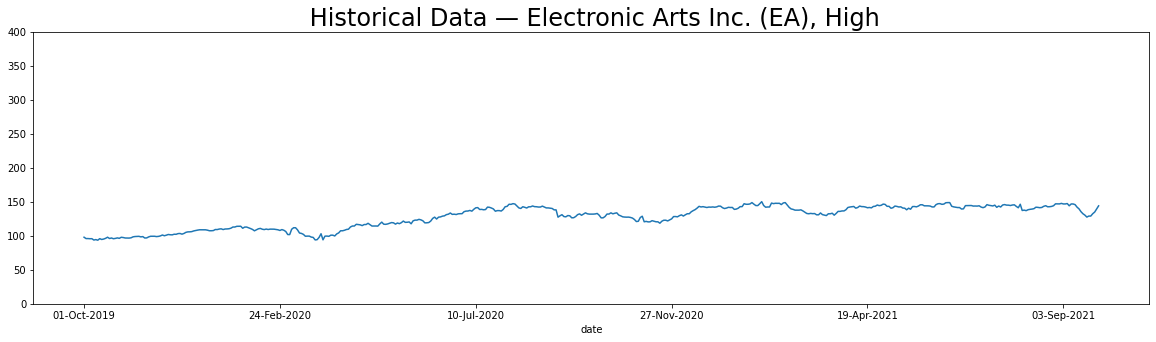

In [41]:
df3.High.plot(figsize=(20,5))
plt.title(" Historical Data — Electronic Arts Inc. (EA), High", size = 24)
plt.ylim(0,400)
plt.show()

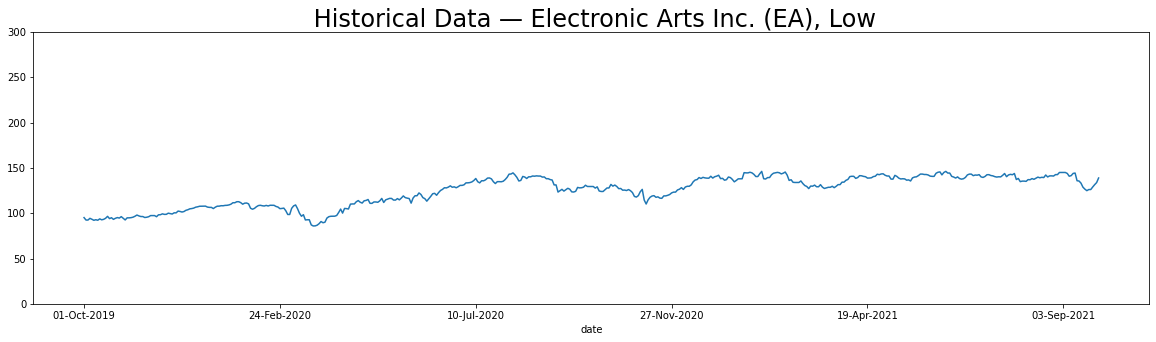

In [42]:
df3.Low.plot(figsize=(20,5))
plt.title(" Historical Data — Electronic Arts Inc. (EA), Low", size = 24)
plt.ylim(0,300)
plt.show()

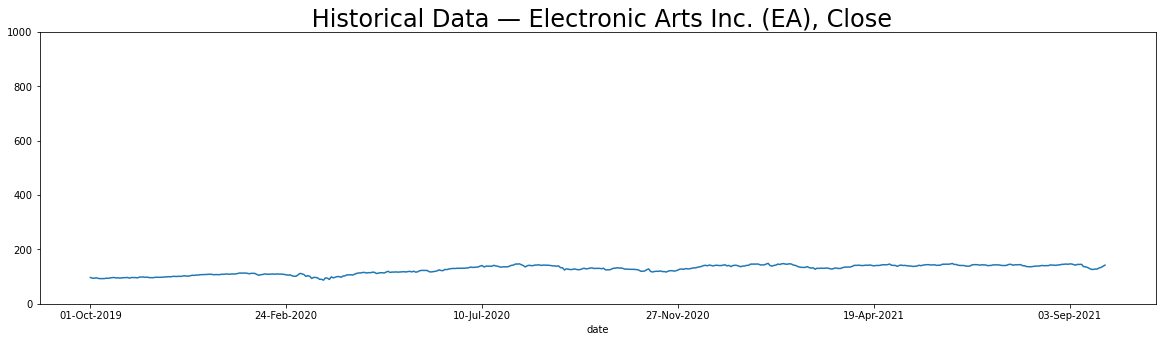

In [43]:
df3.Close.plot(figsize=(20,5))
plt.title(" Historical Data — Electronic Arts Inc. (EA), Close", size = 24)
plt.ylim(0,1000)
plt.show()

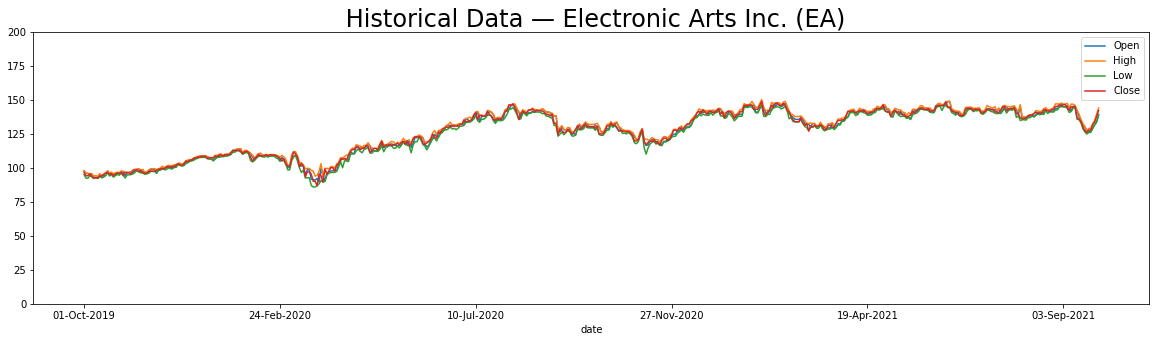

In [44]:
df3.plot(figsize=(20,5))
plt.title(" Historical Data — Electronic Arts Inc. (EA)", size = 24)
plt.ylim(0,200)
plt.show()

###  Historical Data — Netflix (NFLX)


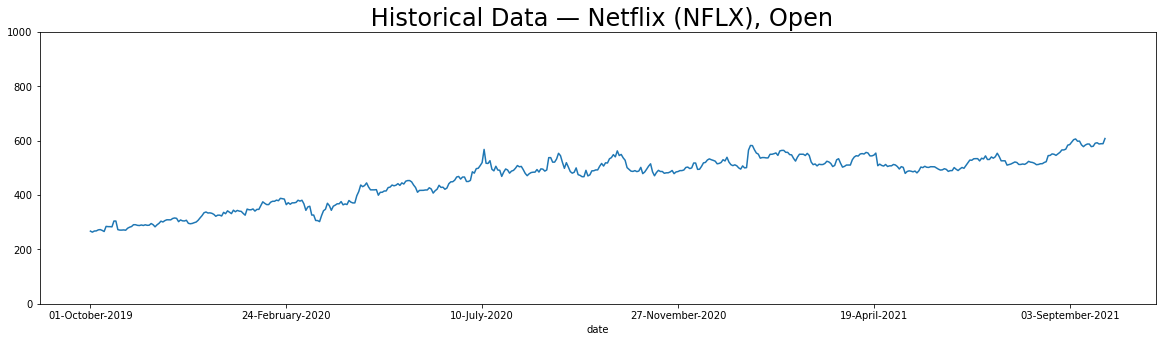

In [45]:
df4.Open.plot(figsize=(20,5))
plt.title(" Historical Data — Netflix (NFLX), Open", size = 24)
plt.ylim(0,1000)
plt.show()

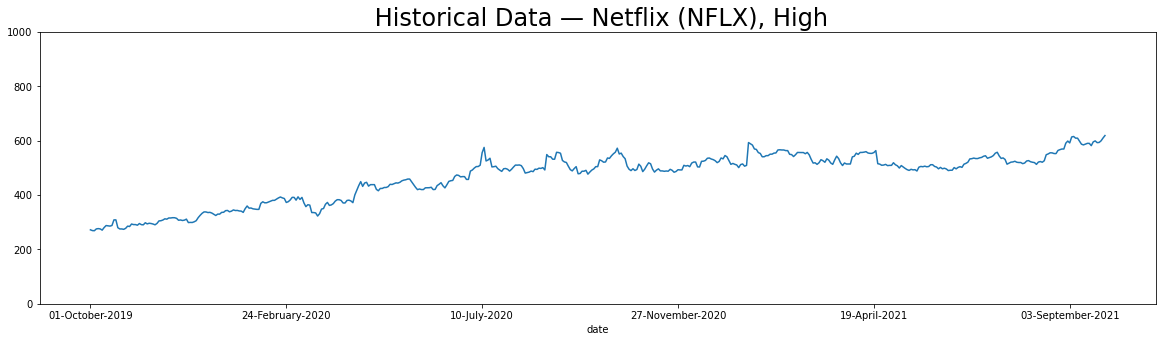

In [46]:
df4.High.plot(figsize=(20,5))
plt.title(" Historical Data — Netflix (NFLX), High", size = 24)
plt.ylim(0,1000)
plt.show()

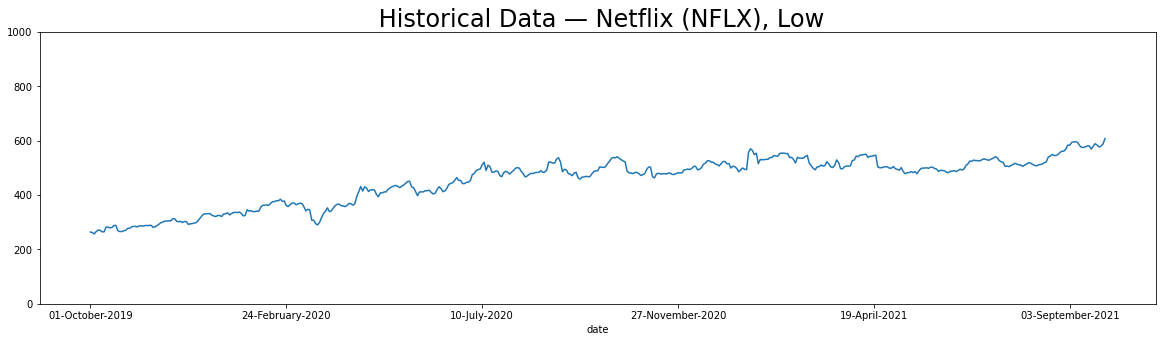

In [47]:
df4.Low.plot(figsize=(20,5))
plt.title(" Historical Data — Netflix (NFLX), Low", size = 24)
plt.ylim(0,1000)
plt.show()

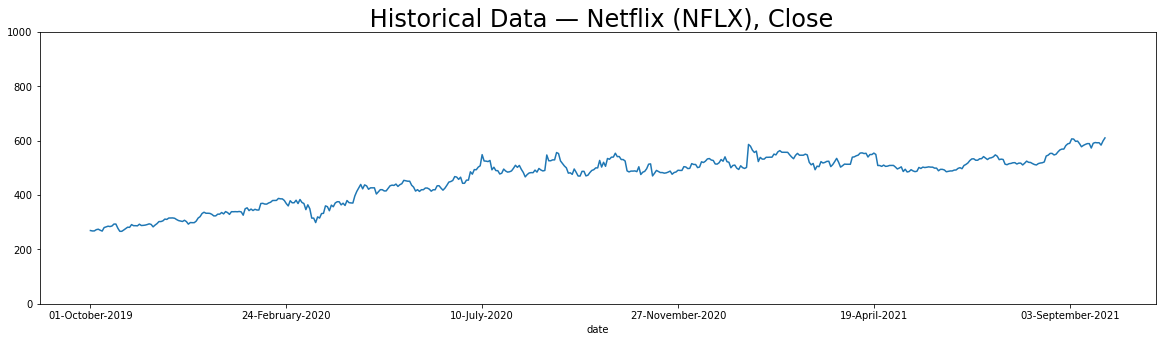

In [48]:
df4.Close.plot(figsize=(20,5))
plt.title(" Historical Data — Netflix (NFLX), Close", size = 24)
plt.ylim(0,1000)
plt.show()

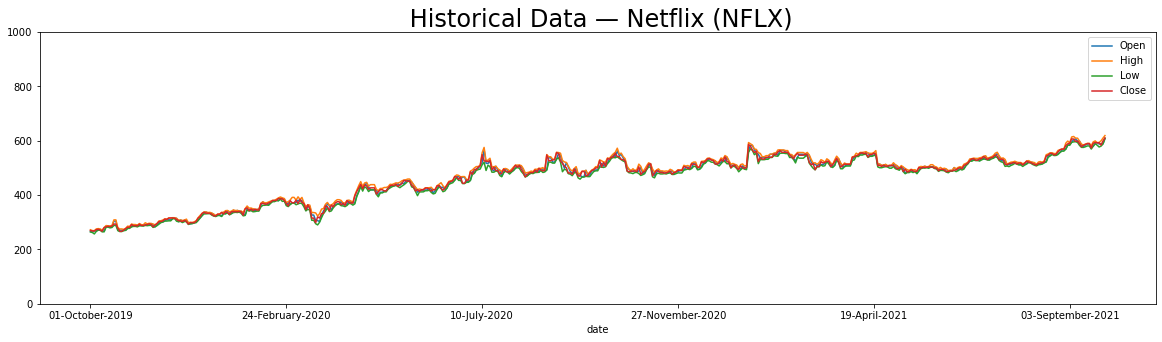

In [49]:
df4.plot(figsize=(20,5))
plt.title(" Historical Data — Netflix (NFLX)", size = 24)
plt.ylim(0,1000)
plt.show()

In [50]:
df1.to_csv('TSLA.csv')
df2.to_csv('FB.csv')
df3.to_csv('EA.csv')
df4.to_csv('NFLX.csv')